<a href="https://colab.research.google.com/github/bbwolcott/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: When comparing total 311 request counts per community district against the respective population, there seems to be a general trend that the higher the population, the higher the number of 311 requests. However, there is a lot of variance in the data. Maybe narrowing in on specific complaint type categories will help us better understand trends in 311 requests across the city.

"Noise" and "heat and hot water" were the most frequest requests in the entire 311 dataset. Let's try isolating the count of requests in each of those two categories versus all the other complaints.

In [0]:
import pandas as pd
from google.colab import drive

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- **Step 1**. First you will need to prep your data to get the count of complaints in each of the three categories. You can update the code from lecture that gets the total count of 311 requests per CD to instead get the count of 311 requests per CD that meet the criteria for the 3 categories. You should create three seprate dataframes, one per category:

  1. `complaint_type = 'Noise - Residential'`
  2. `complaint_type = 'HEAT/HOT WATER'`
  3. Everything else: `(complaint_type != 'Noise - Residential' and complaint_type != 'HEAT/HOT WATER')`

In [0]:
# this function will recode the community_board value into borocd in a new column
  def recode_borocd_counts(row):
    if row.community_board[0] != 'U':
      if 'MANHATTAN' in row.community_board:
        return '1' + row.community_board[:2]
      elif 'BRONX' in row.community_board:
        return '2' + row.community_board[:2]
      elif 'BROOKLYN' in row.community_board:
        return '3' + row.community_board[:2]
      elif 'QUEENS' in row.community_board:
        return '4' + row.community_board[:2]
      elif 'STATEN ISLAND' in row.community_board:
        return '5' + row.community_board[:2]
    else:
      return 'Invalid borocd'


In [127]:
cb_noise_counts = df[df.complaint_type == 'Noise - Residential'].groupby('community_board').size().reset_index(name='count_of_noise')
cb_noise_counts['community_board'] = cb_noise_counts.apply(recode_borocd_counts, axis=1)
cb_noise_counts=cb_noise_counts.drop(cb_noise_counts.index[0])
cb_noise_counts=cb_noise_counts[cb_noise_counts['count_of_noise']>200]
cb_noise_counts=cb_noise_counts[cb_noise_counts.community_board!= "Invalid borocd"]
cb_noise_counts.head


<bound method NDFrame.head of    community_board  count_of_noise
1              201            3691
2              301            5844
3              101             722
4              401            4589
5              501            5052
6              202            1939
7              302            3795
8              102            1837
9              402            2279
10             502            1592
11             203            4238
12             303            7898
13             103            6272
14             403            3881
15             503            1188
16             204            7407
17             304            6394
18             104            2702
19             404            2710
20             205            6819
21             305            5225
22             105             741
23             405            4911
24             206            3871
25             306            1884
26             106            2078
27             406       

In [133]:
cb_water_counts = df[df.complaint_type == 'HEAT/HOT WATER'].groupby('community_board').size().reset_index(name='count_of_water')
cb_water_counts['community_board'] = cb_water_counts.apply(recode_borocd_counts, axis=1)
cb_water_counts=cb_water_counts[cb_water_counts['count_of_water']>100]
cb_water_counts=cb_water_counts[cb_water_counts.community_board!= "Invalid borocd"]
cb_water_counts.head

<bound method NDFrame.head of    community_board  count_of_water
0              201            3346
1              301            2868
2              101             276
3              401            2466
4              501            1644
5              202            2364
6              302            1189
7              102            1649
8              402            2018
9              502             401
10             203            3761
11             303            5460
12             103            3741
13             403            2127
14             503             208
15             204           10942
16             304            2537
17             104            2113
18             404            5373
19             205            9555
20             305            4204
21             105             676
22             405            1954
23             206            4944
24             306            1156
25             106            1936
26             406       

In [136]:
cb_else_counts = df[(df.complaint_type != 'Noise - Residential') & (df.complaint_type != 'HEAT/HOT WATER')].groupby('community_board').size().reset_index(name='count_of_else')
cb_else_counts['community_board'] = cb_else_counts.apply(recode_borocd_counts, axis=1)
cb_else_counts=cb_else_counts.drop(cb_else_counts.index[0])
cb_else_counts=cb_else_counts[cb_else_counts['count_of_else']>1200]
cb_else_counts=cb_else_counts[cb_else_counts.community_board!= "Invalid borocd"]
cb_else_counts.head

<bound method NDFrame.head of    community_board  count_of_else
1              201          20316
2              301          59389
3              101          20261
4              401          53370
5              501          58449
6              202          15736
7              302          39077
8              102          33202
9              402          30941
10             502          38186
11             203          21739
12             303          53002
13             103          41386
14             403          33232
15             503          47333
16             204          42737
17             304          40621
18             104          34004
19             404          25418
20             205          35446
21             305          52407
22             105          36049
23             405          64641
24             206          23624
25             306          39499
26             106          25860
27             406          22901
28             207

- **Step 2**. Create a stacked bar chart comprised of three stacked bars. The total height of each bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per CD.
  - number of `'Noise - Residential'` complaints per CD
  - number of `'HEAT/HOT WATER'` complaints per CD
  - number of other complaints per CD 

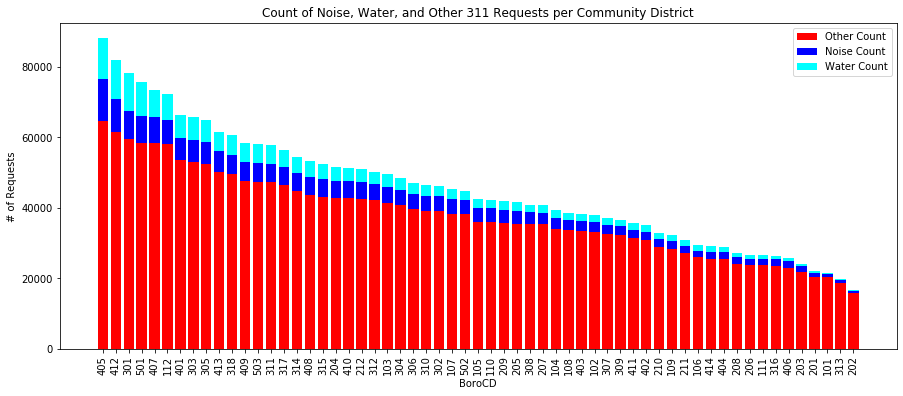

In [140]:
# list of bar positions on x axis
position_on_x = np.arange(len(cb_noise_counts))
# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly
else_counts = np.array(cb_else_counts.sort_values(by='count_of_else', ascending=False).count_of_else)
noise_counts = np.array(cb_noise_counts.sort_values(by='count_of_noise', ascending=False).count_of_noise)
water_counts = np.array(cb_water_counts.sort_values(by='count_of_water', ascending=False).count_of_water)

plt.figure(figsize=(15,6))

plot1=plt.bar(
    position_on_x,
    else_counts,
    align='center',
    color='red',
    label='Other Count'
)

plot2=plt.bar(
    position_on_x,
    noise_counts,
    bottom=else_counts,
    align ='center',
    color='blue',
    label='Noise Count'
)

plot3=plt.bar(
    position_on_x,
    water_counts,
    bottom= noise_counts + else_counts,
    align ='center',
    color='cyan',
    label='Water Count'
)

plt.xticks(position_on_x, cb_else_counts.sort_values(by='count_of_else', ascending=False).community_board, rotation=90)

plt.title('Count of Noise, Water, and Other 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()

- **Step 3**. Create a scatter plot of community district's 311 counts per category (y-axis) vs. CD population (x-axis). The scatter plot should show each of the three complaint categories in a different color.

In [8]:
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [0]:
# Create a function recode_borocd_pop that combines and recodes the Borough and CD Number values to create a borocd unique ID

def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [0]:
merge_counts_1 = pd.merge(left=cb_else_counts, right=cb_noise_counts, left_on ='community_board', right_on='community_board')
merge_counts_2 = pd.merge(left=merge_counts_1, right=cb_water_counts, left_on ='community_board', right_on='community_board')
merged_data = pd.merge(left=merge_counts_2, right=population, left_on='community_board', right_on='borocd')

In [152]:
cd_data = merged_data[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_else', 'count_of_noise', 'count_of_water']]
cd_data.head()

,borocd,Borough,CD Name,2010 Population,count_of_else,count_of_noise,count_of_water
0,201,Bronx,"Melrose, Mott Haven, Port Morris",91497,20316,3691,3346
1,301,Brooklyn,"Williamsburg, Greenpoint",173083,59389,5844,2868
2,101,Manhattan,"Battery Park City, Tribeca",60978,20261,722,276
3,401,Queens,"Astoria, Long Island City",191105,53370,4589,2466
4,501,Staten Island,"Stapleton, Port Richmond",175756,58449,5052,1644


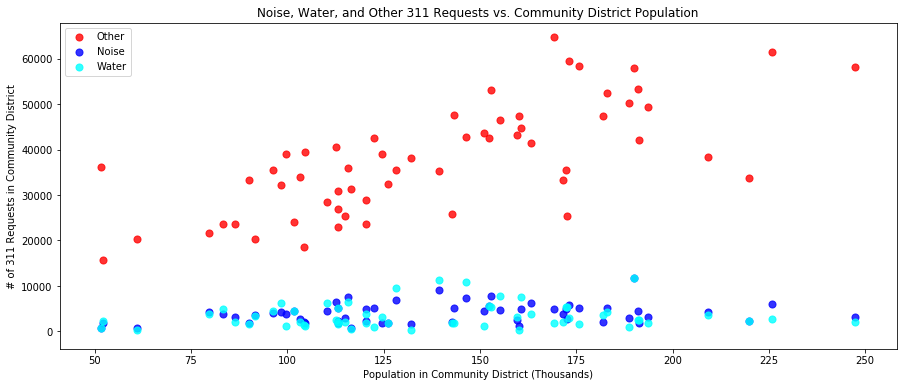

In [157]:
# define the color to be used for the markers for each data subset group
colors = ["red", "blue", "cyan"]

# define the labels to be used for the data subset group
groups = ["Other", "Noise", "Water"]

plt.figure(figsize=(15,6))

plt.scatter(
  cd_data['2010 Population']/1000,
  cd_data['count_of_else'],
  alpha=0.8,
  c=colors[0],
  s=50,
  label=groups[0]
)
# each new plot gets rendered on top of the previous one
plt.scatter(
  cd_data['2010 Population']/1000,
  cd_data['count_of_noise'],
  alpha=0.8,
  c=colors[1],
  s=50,
  label=groups[1]
)
plt.scatter(
  cd_data['2010 Population']/1000,
  cd_data['count_of_water'],
  alpha=0.8,
  c=colors[2],
  s=50,
  label=groups[2]
)

plt.title('Noise, Water, and Other 311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# add legend at specified location
plt.legend(loc=2)

plt.show()